### Hello. My name is Irfan Campara and I hope whoever is reading this is doing well. This is my data mining project 1 and I will be analyzing a dataset called Anxiety Attack : Factors, Symptoms, and Severity.

# Introducing the problem
The problem is the increasing ammount of anxious individuals within our modern world. The problem that I'm trying to solve is to find the most common links to the severity of anxiety attacks and see how different features might connect to one another to pinpoint key things to avoid for limited anxeity. The reason I'm so passionate about solving this problem is that I have seen both myself and friends be individuals who have dealt with anxeity, and because I was extremely interested in solving this problem.


### Introducing The Data, Dataset Link: https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity
The data that I'm using is from kaggle and it is called Anxiety Attack: Factors, Symptons, and Severity. The dataset has around 12,000 records or rows, and there are about 20 columns or features that range from age to hours of sleep and how it relates to the severity of anxiety attacks. The features or columns that I'm most interested in researching are hours of sleep, physical activity and caffiene intake as those have the most impact in my personal life. I also like that the dataset provides so many features so that I can truly see how other features can impact other individuals. Data From: Akshay Choudhary

# Possible Questions
The questions that I will ask myself along this process are as follow, "What are the top causes of a severe anxiety attack?", "How are varying causes of severe anxiety attacks possibly linked to one another?", "What common trends do I notice that are applicable in my own life but also in the lives of other individuals?", "What are the physiological effects of said anxeity and how are those affected by varying causes of anxiety?". I'm highly interested in this dataset because I will be able to not only pinpoint links to possible causes to severe anxiety attacks, but also see what tyoe of individuals are likely to see themselves with these features.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this code cell I'm simply printing out the shape of the data so that I can understand the rows and columns present.

In [33]:
df = pd.read_csv('anxiety_attack_dataset.csv')


print(df.shape)

(12000, 20)


In [34]:
df.head() #Printing out the first 5 rows to get a quick understanding of the data in the dataset

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


Pre-processing the data: Pre-processing is a important step in the steps of data mining and machine learning as your insights and model accuracy are only as good as your data. There are many things I will do to clean my data such as removing null values to ensure visualizations are functional, imputing data if it is missing and many other things to ensure analysis is correct. This dataset is already very clean but I will display my thought process and pre processing steps below
--------------------------------------------------------------------------------

Below I checked if there were any NaN or null values within my data. The reason I have done this is because visualizations often cannot process null values, and if there is visualizations that can impute null values they are often faulty.

In [35]:
df.isna().sum() # No NaN values were found, I will continue with pre-processing

,0
ID,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0


Pre-Processing continues: Below I have removed the first column or the ID column as it gives unecessary counting of rows which is not required, and the ID won't benefit analysis of links to anxiety. I have also dropped the Occupation and Gender column from the dataset as it will be most difficult to impute those values so I will continue with the numberic values.

In [36]:
df = df.drop(columns=df.columns[0])
df = df.drop(columns=df.columns[1])
df = df.drop(columns=df.columns[1])
df.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,46,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,32,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,60,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,25,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


Below I have continued pre-processing the data by removing strings of "Yes" and No from columns such as Smoking. Dizziness etc as this will make it much easier to see binomial causation/correlation rather than using strings with "Yes" or "No"

In [37]:
df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})
df['Dizziness'] = df['Dizziness'].replace({'Yes': 1, 'No': 0})
df['Medication'] = df['Medication'].replace({'Yes': 1, 'No': 0})
df['Recent Major Life Event'] = df['Recent Major Life Event'].replace({'Yes': 1, 'No': 0})
df['Family History of Anxiety'] = df['Family History of Anxiety'].replace({'Yes': 1, 'No': 0})


<ipython-input-37-0f912c677de2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})
<ipython-input-37-0f912c677de2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dizziness'] = df['Dizziness'].replace({'Yes': 1, 'No': 0})
<ipython-input-37-0f912c677de2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior,

I have done one last preprocessing step which is using sampling with random values while keping the main trends of the data. I have done so below as the 12 thousand values van make it very difficult to create accurate plots and visualizations so I have cut the size down to 100 points while also keeping a random_state to ensure consistency on runs.

In [38]:
sampled_df = df.sample(n=100, random_state=42)
sampled_df.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
1935,58,3.3,8.5,47,10,0,0,1,120,19,3,0,0,4,0,7,1
6494,29,9.5,2.7,407,11,1,0,8,136,13,1,0,1,9,0,4,7
1720,34,3.7,8.0,108,11,1,1,2,123,32,5,0,0,8,0,2,1
9120,24,8.7,4.6,134,4,0,0,3,75,25,4,0,0,3,0,3,5
360,41,7.2,9.4,493,4,0,0,3,113,38,1,1,0,2,0,9,9


Data Understanding/Visualization: I have now finished my pre-processing steps and I will begin on the Data Understanding/Visualization section of my project to properly gain insights itno the data. I plan to use pandas plotting, matplotlib and seaborn to get the most out of the visualization for my data.

(Storytelling/ Data Visualization) Visualization 1: Heatmap for each respective feature






Below is a heatmap using seaborn in order to see the correlation of certain values. Every value is drawn out to see it's respective correlation. As the color becomes darker and blacker it is more and more correlated. However, you can ignore the diagnol line of black squares as that simply shows that each feature is perfectly correlated with itself (As Expected). Also pay attention to the values because as they get closer to positive 1 they are more and more correlated. It is clear that the highest correlation for Severity of an anxeity attack are Dizziness, Breathing Rate, Heart Rate and Sleep Hours. These values are interesting to see as they are almost all physiological responses which one often thinks of during an anxiety attack. One other thing that this visualization shows us is correlation between other features which might come into play later, for example there isd a high correlation between recent major life event and therapy sessions or likelihood of using medication and consuming alcohol. Overall this visualization shows us a broad overview but I'm excited to look more into the features as the heatmap only gets us started without having solved the initial question.

<Axes: >

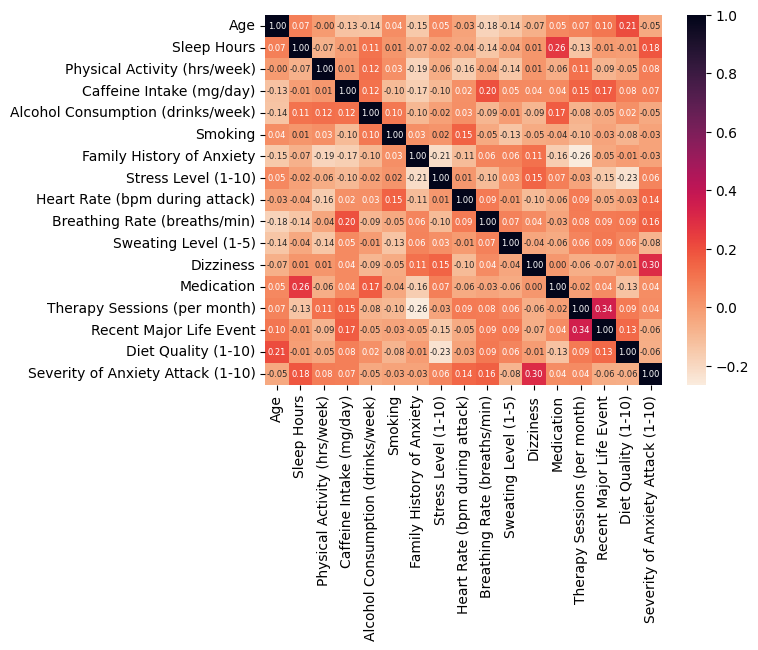

In [39]:
sns.heatmap(sampled_df.corr(), annot=True, cmap='rocket_r', fmt='.2f', annot_kws={"size": 6})

Now that I have identified the key factors that contribute to having a severe anxiety attack. I will now go into the links between these factors and more about what their probable causes might be.

(Storytelling/ Data Visualization) Visualization 2: Scatterplot between Breathing Rate and Caffeine Intake.
Below is a scatterplot between two features within my dataset: caffeine intake and breathing rate. The reasoning behind why I chose these two features is because I wanted to see the link between a correlated feature to anxiety attacks (breathing rate) and a possible correlated value to breating rate (caffeine intake). The reasoning behind why I saw correlation was because I noticed a slight correlation in the heatmap between caffeine intake and breathing rate, and the correlation value was 0.2 so I expected to see some small correlation within the scatter plot but appears there is little to none. The original question was not answered by this visual as it is clear that the dots are evenly spread without much linearity. Also nothing key jumped out at me besides the lack of much correlation. Even though the visuals are not correlated to the hope I was expecting, it is good to see part of the process that goes into data mining and see that a posible link to anxiety attacks was not as causational as previously thought, and its good that I can keep drinking my Celsius (:


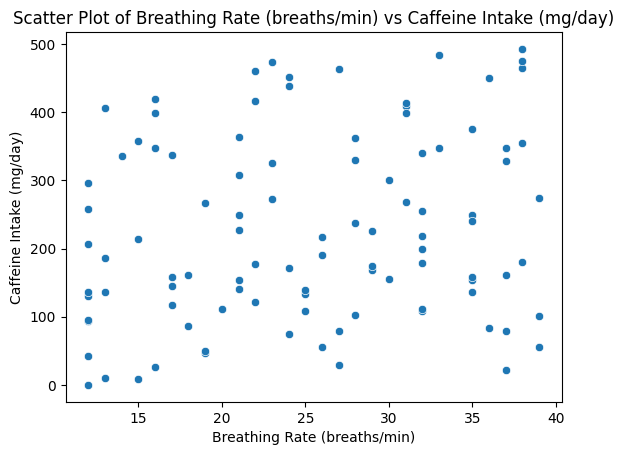

In [40]:
sns.scatterplot(x='Breathing Rate (breaths/min)', y='Caffeine Intake (mg/day)', data=sampled_df)
plt.title('Scatter Plot of Breathing Rate (breaths/min) vs Caffeine Intake (mg/day)')
plt.show()

(Storytelling/ Data Visualization) Visualization 3: Boxplot for heart rate during a anxiety attack and smoking. For this visualization I decided to use a boxplot as I was plotting a binary feature and a continious feature so it made the most sense to me initially. It also appears that the boxplot is much easier to read and understand as the correlation is clear. From the visualization it is clear that on average the heart rate during a anxiety attack is higher for individuals who smoke, and the difference can be seen between the difference between the medians which is about 15 beats per minute. It is great to have found a link between smoking and heart rate during anxiety attack as this allows smoking to have some direct linkage to severity within a anxiety attack. Although there was not much luck with the previous visualization I'm happy to find this correlation as it is not only interesting but very easy to understand. This visualization does help us in beginning to address the initial question as we have found a link (smoking) to severity of anxiety attacks indireftly through smoking's correlation with heart rate during an anxiety attack. I was also suprised that the extremes for both smoking/non smokign were about the same and I expected smokers to have much more extremes when it came to heart rate. Overall I'm happy with the findings and now to move on to the next.

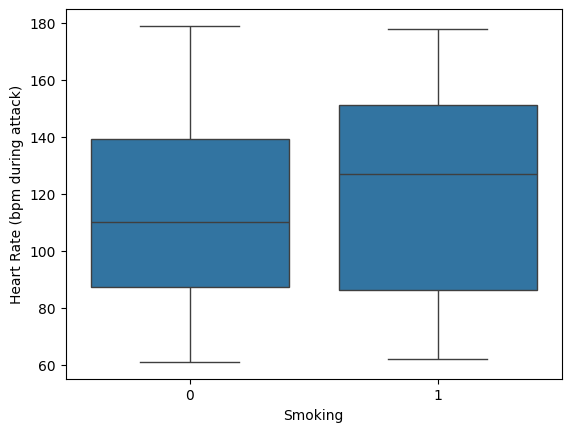

In [41]:
sns.boxplot(x="Smoking", y="Heart Rate (bpm during attack)", data=sampled_df)
plt.show()

(Storytelling/ Data Visualization) Visualization 4: Histogram of Dizziness v.s Stress Level (1-10).  Below is a histogram for comparison between the binary feature of dizziness during a anxiety attack and the overall stress level of the individuals. For my specific histogram there are some varying things I did in order to make it more visually appealing. First the step element makes it easier to see the difference in between relative frequencies for each values (specifed by stat = "density"). I have also put common_norm to False so the proportions of each are evaluated seperately and the feature with a higher count dosen't overpower the other. From my histogram it is clear that we have found another linkage between something that is correlated to anxiety attack severity (Dizziness) and a feature that is connected to Dizziness (stress level). At the lower stress levels it is clear that there is much less dizziness present, but as we approach higher and higher concentrations of stress it is clear that the likelihood for someone to be dizzy to much greater. One thing that stood out to me during the visualization was how powerful each extreme was as individuals who suffered high stress were much more liekly to experience dizziness and the opposite is true for low stress individuals. This visualization also helps me come closer to answering my final question as I have found another indirect correlation that can correlate to severity of anxiety attacks.Overall I'm happy to find find this linkage it aids to my claim that there is possible linkage between certain features that cause severe anxiety attack.

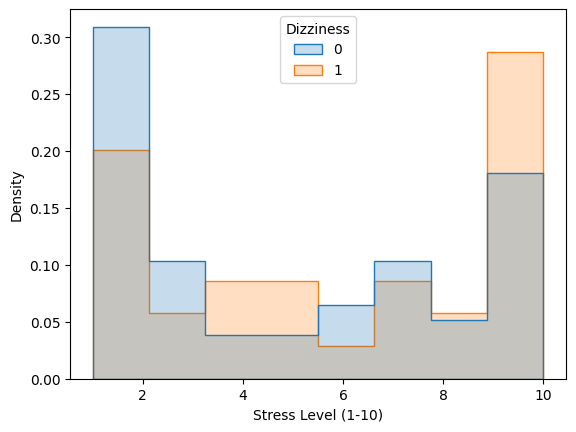

In [42]:
sns.histplot(data=sampled_df, x="Stress Level (1-10)", hue="Dizziness", element="step", stat = "density", common_norm=False)
plt.show()

(Storytelling/ Data Visualization) Visualization 5: Violinplot of Sleep Hours vs Medication. Below is a violin plot which is a interesting data visualization chart as it allows us not only to see points but alson the density of a binary feature (medication) and a continious feature (sleep hours). I was happy to see another confirmed correlation between medication and sleep hours. It is clear that the larger portion of individuals who are medicated have longer sleep while the opposite is true for unmedicated individuals. This visualization is not only confirming a trend between sleep hours and medication but also between mediction and severity of anxiety attacks, thus assisting me in answering my original question. I really enjoyed this correlation confirmation and the visualization of the violin plot for medicated individuals had a long tail with a large head which made the correlation very easy to visualize. One thing that did stand out to me through the violin plot was that sleep hours for medicated individuals were highly concentrated to higher ammounts of sleep while non medicated individuals had typically less sleep with less concentration.

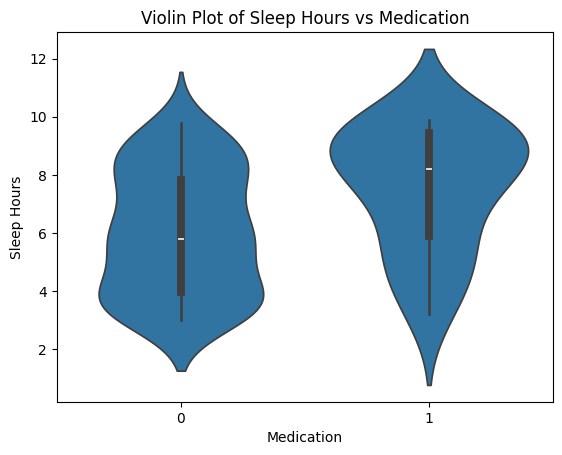

In [43]:
sns.violinplot(x='Medication', y='Sleep Hours', data=sampled_df)
plt.title('Violin Plot of Sleep Hours vs Medication')
plt.show()


**Impact: **
This project was very interesting and there was a present impact from each portion that I would like to discuss. This dataset was already relatively clean so there was little impact from data processing besides removing columns and changing "Yes" and "No" to 1s and 0s to allow for them to become binary features. For the visualizations it got a little more interesting. For my first visualization, there was many things learned in one single visualization such as what are the major correlations to severity of anxiety attacks and what those specific features are correlated to as well. There was also correlations in the heatmap that stood out such as a correlation between therapy session and recent family event. Overall the first visualization gave us a quick summary of correlations to look deeper into. For Visualizations 2-5 I attempted to find links between features that seemed to impact severity of anxiety attacks. For these visualizations I also decided to change the visualization type from barchart, histogram, scatterplot and even violin plot. There was little success with the scatterplot between breathing rate and caffeine intake, but the process of looking for these correlations and visualizations only to be proven right or wrong is a part of the process. The third visualization between heart rate and being a smoker clearly revealed a correlation through the boxplot and it was interesting to see smoking could be indirectly linked to severity of anxiety attacks, but it is important to not link correlation as causation. The fourth and fifth visualizations being histogram and violinplot both proved my theory of their being a correlation between Medicated v.s sleep hours and stress level v.s Dizziness. Overall I learned a lot throughout this project and I'm happy that my visualizations both disproved and proved my theories from the initial heatmap. This project could have also inorporated further features or collections of data from varying populations to get more perspectives. In conclusion, I hope to use many more visualizations and this project not only benefitted me but can hopefully benefit other individuals who might have struggled with anxiety in their life. Note... while this data is a good summary, one cannot perfectly link certain lifestyle changes to severe anxiety attacks and these visualizations, while interesting, do not apply for every individual. Thanks for reading.

References:
Akshay Choudhary. (2025, January). *Anxiety Attack: Factors, Symptoms, and Severity*, Version 2. https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity